# Lesson 7

We will be examining unsupervised learning and addressing large data sets.

**Goal**

After this lesson, you should:
1. Understand *supervised* and *unsupervised* learning
1. Understand and implement the *k-means clustering* unsupervised learning algorithm.
1. Understand *bag-of-words*, a basic "encoding" technique.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [10,5]

## Final Exam Structure

We've discussed the final exam, but I wanted to make it more concrete. You will be presenting a notebook that covers an analysis of a chosen data set. You can find examples of notebooks on [kaggle.com](http://www.kaggle.com), where they call the notebooks "kernels".

You will present *for a maximum* of 5 minutes. During that 5 minutes, you should cover:

1. What is the data set about?
    - what data are you analyzing, and what do you hope to achieve by analyzing it?
1. What data exploration techniques did you use?
    - Please refer to specific techniques covered in the course.
    - You must have some exploratory graphs which help us visualize the data.
1. Which models did you employ?
    - How did the models perform against one-another?
    - What hyperparameters did you adjust?
    - How did regularization affect the results?
1. What verification methodologies did you use?
    - talk about the recall and precision of your analysis
    - talk about any specific cross validation methods you used

## Supervised vs Unsupervised Learning

So far in this course, we have dealt with models that require manual feature labeling, as well as a predetermined predictor. In other words, we know what the output values of our samples should be when implementing our models.

In unsupervised learning, we don't have output values in mind when building our algorithm. The point of unsupervised learning is to model the underlying distribution of our samples and to determine the structure of our data.

In general, unsupervised learning algorithms can be grouped into two categories:

1. **clustering** is similar to classification, in the sense that we want to determine the inherent groupings in our data
1. **association** is the problem of discovering certain rules that govern our data

One way we can think about unsupervised and supervised learning is to consider the difference between drawing *boundaries* and *grouping* samples.

<img src="https://deepcast.ai/static/img/article3/art3-fig1.png" width="1000">

In other words:
- supervised learning deals with labeled data, and the algorithm attempts to predict the output
- unsupervised learning deals with unlabeled data, and the algorithm learns the structure of the data

### $k$-means clustering

A simple, but effective, unsupervised learning algorithm is **$k$-means clustering**. This algorithm takes *unlabeled data* and attempts to find groups in the data. The number of groups it attempts to find is represented by $k$.

Some examples of how we might use $k$-means clustering:
- take a large set of documents and classify them based on topic, content, or metadata
- identify geographic clusters against a category, such as identifying higher risk crime areas
- detect phishing attacks and common patterns

#### The algorithm

1. randomly define $k$ centroids (we can think of a centroid as circle)
1. for each sample point closest to the corresponding centroid, find the distance between the point and the center of the centroids
1. assign the sample point to the centroid which is "nearest" (i.e. find the cluster whose mean has the least error)
1. update the centroids by calculating new means of all the values belonging to that centroid

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">

In [2]:
########
# Let's use k-means clustering to identify clusters in some random data
########
def build_data(k):
    """ Builds fake data for our k-means algorithm.
        k - the maximum number of "centers" possible
    """
    if k < 1:
        print("ERROR: Must provide at least one center with which to cluster data.")
        return
    clusters = []
    centers = [np.array([np.random.randint(0,k*5),np.random.randint(0,k*5)]) for center in range(np.random.randint(1,k))]
    for center in centers:
        samples = 300
        if np.random.randint(0,2) == 0:
            samples = 10
        clusters.append(np.random.randn(samples,2) + center)

    data = np.concatenate(clusters, axis=0)
    return data

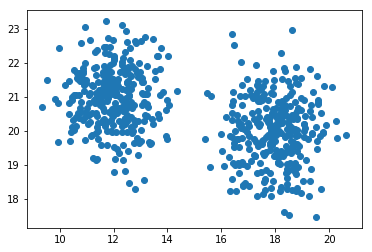

In [4]:
raw = build_data(5)
plt.scatter(raw[:,0],raw[:,1])

In [5]:
# let's use sklearn's k-means algorithm
from sklearn.cluster import KMeans

np.random.shuffle(raw)

split = 4/5
train = raw[:int(split*len(raw))]
test = raw[int(split*len(raw)):]

kmeans = KMeans(n_clusters=3)
kmeans.fit(train)

# retreive our labels
predicted = kmeans.predict(test)

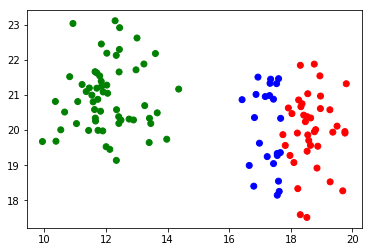

In [6]:
possible_colors = ['b','g','r','c','m','y','k'][:max(predicted) + 1]
colors = [possible_colors[d] for d in predicted]

plt.scatter(test[:,0],test[:,1],c=colors)

#### Optimal $k$ in $k$-means?

It's often not very apparent what $k$ should be. So how do we validate the most appropriate $k$?

We can use the **elbow** method, which runs $k$-means for a range of possible $k$ values, and for each $k$, we score the result. A common scoring is to calculate the sum of squared errors.

We plot the scores and consider the "elbow" value to be the optimal $k$. The intuition is that we want to minimize our sum of squared error (sse), but the sse $\rightarrow 0$ as $k \rightarrow \infty$. So the goal is to minimize $k$ while also choosing a small sse.

Text(0,0.5,'score')

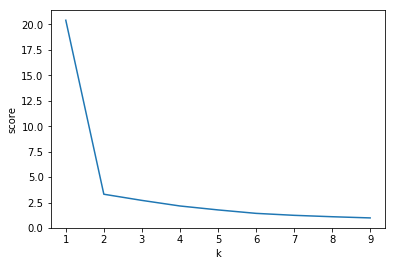

In [7]:
# possible ks
k_values = range(1,10)
k_mean_models = [KMeans(n_clusters=k) for k in k_values]
scores = [kmean.fit(train).score(train) for kmean in k_mean_models]

norm_scores = [score/max(scores) for score in scores]

plt.plot(k_values,norm_scores)
plt.xlabel('k')
plt.ylabel('score')

#### Disadvantages
While it's very easy to understand, trains fast, and can be widely applied to cluster analysis, there are some big disadvantages:

1. the performance of the algorithm is slower than the other clustering algorithms
1. clusters are assumed to approximately "spherical" and evenly sized
1. small variations can lead to extremely different results (high variance)

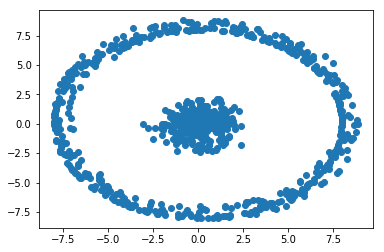

In [8]:
# For instance, consider this data set
import math

cluster_1 = np.random.randn(300,2) + np.array([0,0])
cluster_2 = []

def perturb():
    return np.random.randint(0,2) * np.random.random_sample()

for x in range(500):
    cluster_2.append([8*math.cos(x) + perturb(), 8*math.sin(x) + perturb()])
        
cluster_2 = np.array(cluster_2)
data = np.concatenate((cluster_1,cluster_2),axis=0)

plt.scatter(data[:,0],data[:,1])

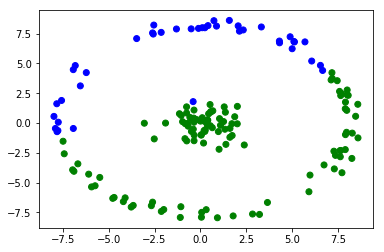

In [9]:
raw = data
np.random.shuffle(raw)

split = 4/5
train = raw[:int(split*len(raw))]
test = raw[int(split*len(raw)):]

kmeans = KMeans(n_clusters=2)
kmeans.fit(train)
predicted = kmeans.predict(test)

possible_colors = ['b','g','r','c','m','y','k'][:max(predicted) + 1]
colors = [possible_colors[d] for d in predicted]

plt.scatter(test[:,0],test[:,1],c=colors)

## Natural Language Processing (NLP)

NLP refers to the practice of performing predictive and classification analysis against natural language. This is often a difficult problem because language is inherently messy.

There are a number of NLP business applications, and this is a field which is readily emerging at the forefront of new ventures:

1. automated customer service
1. sentiment analysis
1. market intelligence and competitive analysis
1. personal assitants (e.g. siri, google voice, alexa, etc...)

As you've seen, most of our ML models work with numbers, and so we need to figure out a way to model language using numbers. Specifically, we will be looking at vectors that represent our natural language. This is a process known as **feature encoding**.
 
 **bag-of-words** is a simple method that allows us to extract features from text in order to build useful models. In order to develop this feature extraction technique, we will need two ideas:
 
 1. a dictionary of known words
 1. a way to measure the frequency of known words
 
 In the same way that a set discards ordering information, bag-of-words discards all information about the structure and ordering of the words. It just considers the words themselves.

Let's examine the bag-of-words approach.

Consider this vietnamese nursery rhyme:

```
Con cò bé bé
Nó đậu cành tre
Đi không hỏi mẹ
Biết đi đường nào
Khi đi em hỏi
Khi về em chào
Miệng em chúm chím
Mẹ có yêu không nào
```

Translation
```
A little baby stork
It's perched on a branch of bamboo 
It went away, but didn't ask its mother.
How does she know where it went?
When you go out, ask,
When you arrive home, say hello.
Your mouth is slightly open*
How can mother not love you.
```

In [10]:
# First, we build our dictionary, which consists of all the words in the rhyme
# This allows us to design the vocabulary we will be using in our analysis

poem = """Con cò bé bé
Nó đậu cành tre
Đi không hỏi mẹ
Biết đi đường nào
Khi đi em hỏi
Khi về em chào
Miệng em chúm chím
Mẹ có yêu không nào"""

unique_words = set()
for word in poem.replace('\n',' ').split(' '):
    unique_words.add(word.lower())

vocabulary = [word for word in unique_words]
print(vocabulary)

['mẹ', 'về', 'bé', 'nào', 'chào', 'cò', 'chím', 'cành', 'con', 'biết', 'khi', 'đường', 'miệng', 'nó', 'yêu', 'không', 'đậu', 'đi', 'có', 'hỏi', 'tre', 'em', 'chúm']


In [11]:
# Now, we turn each line into a vector representation of our vocabulary.
# In this example, we will consider each line to be a single "document"

lines = poem.split('\n')

def extract_feature(document):
    document_vector = []
    dsplit = set(map(lambda x: x.lower(), document.split(' ')))
    for word in vocabulary:
        if (word in dsplit):
            document_vector.append(1)
        else:
            document_vector.append(0)
    return document_vector

encoded_document = []
for line in lines:
    encoded_document.append(extract_feature(line))

encoded_document

[[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]]

Can anyone make some statements about the problems associated with encoding a document as above? What might be some ways we could mitigate those problems?

#### Grams

One way to deal with the sparse vector problem is to consider $n-$grams of words. Specifically, an **$n-$gram** is an **$n-$token** sequence of words. For example, a $2-$gram (aka bigram) might be a sequence such as "it was", "put down", "your sandwich".

In [12]:
# Let's build all the bigrams for the first document from the above poem

def build_bigrams(document):
    grams = []
    dsplit = list(map(lambda x: x.lower(), document.split(' ')))
    for i in range(len(dsplit) - 1):
        grams.append([dsplit[i],dsplit[i+1]])
    return grams

def build_bigrams_zip(document):
        dsplit = list(map(lambda x: x.lower(), document.split(' ')))
        return list(zip(dsplit,dsplit[1:],dsplit[2:],dsplit[3:]))

documents_grams = []
for line in lines:
    documents_grams.append(build_bigrams_zip(line))               

print(documents_grams)
def build_n_grams(document, n):
    """Constructs a vector of n_grams for a given document
    """
    document_vector = []
    return document_vector

[x**2 for x in range(10)]

[[('con', 'cò', 'bé', 'bé')], [('nó', 'đậu', 'cành', 'tre')], [('đi', 'không', 'hỏi', 'mẹ')], [('biết', 'đi', 'đường', 'nào')], [('khi', 'đi', 'em', 'hỏi')], [('khi', 'về', 'em', 'chào')], [('miệng', 'em', 'chúm', 'chím')], [('mẹ', 'có', 'yêu', 'không'), ('có', 'yêu', 'không', 'nào')]]


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]